
Consigna: 

1.Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.

2.Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.

3.Interpretar los resultados obtenidos

Me intersa saber a partir de qué cantidad estos se consideran anómalos o outliers y en que días de la semana se produce esto. Conociendo esto, se podrá suplir la demanda de bicicletas eficientemente.

ABSTRACT: Es cada vez más frecuente la introducción de bicicletas para alquiler en las grandes ciudades con la finalidad de aumentar opciones de transportes sustentables y amigables con el medio ambiente y proporcionar simultaneamente mayor comodidad durante el viaje. Para lograr esto y poder brindar un buen servicio, es importante conocer cuándo la demanda aumenta para asegurar que haya oferta disponible y reducir tiempo de espera mejorando la experiencia del usuario. 

Descripcion del dataset:
Este dataset contiene información del pronostico (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), la cantidad de bicicletas rentadas por hora e información de la fecha en la cual fue rentada.

Informacion de los atributos: 
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)





In [1]:
#Data set 2: Seoul alquiler de bicicletas
import pandas as pd
from datetime import datetime
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive'
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")

df= pd.read_csv('SeoulBikeData.csv',sep=',',encoding= 'unicode_escape', parse_dates=['Date'], date_parser=custom_date_parser)
df.head()


Mounted at /content/gdrive
/content/gdrive/My Drive


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [3]:
#El describe muestra las metricas estadisticas principales para cada variable. La media de Rented bike Count es de 705 unidades.

#Para conocer el día de la semana creo una nueva columna llamada "dia_de_la_semana"

In [4]:
df['dia_de_la_semana'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dia_de_la_semana
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


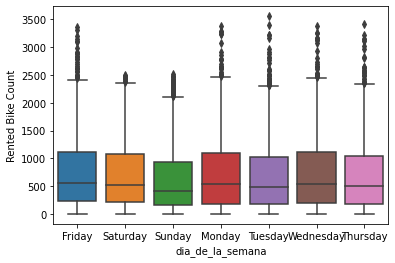

In [5]:
import seaborn as sns
ax = sns.boxplot(x="dia_de_la_semana", y="Rented Bike Count", data=df)

El grafico de arriba indicaría que la mediana de cantidad de bicicletas alquiladas según el día ronda alrededor de las 500 bicicletas por día coincidiendo con la mediana del .describe().

Las cantidades que se consideran outliers comienzan en el rango 2000-2500 unidades de bicicletas alquiladas 

In [6]:
#Se agrupa por dia de la semana y por hora para mostrar cantidad de bicicletas alquiladas acumuladas.
df_suma=df.groupby(["dia_de_la_semana","Hour"])['Rented Bike Count'].sum().reset_index()
df_suma.head()


,dia_de_la_semana,Hour,Rented Bike Count
0,Friday,0,28044
1,Friday,1,22879
2,Friday,2,15218
3,Friday,3,10219
4,Friday,4,6652


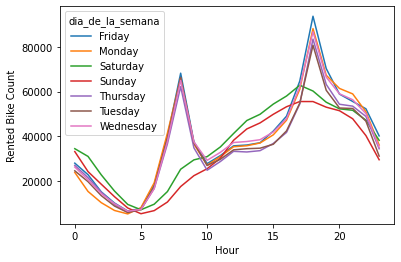

In [7]:
import seaborn as sns
sns.lineplot(data=df_suma, x="Hour", y="Rented Bike Count", hue="dia_de_la_semana")

Este grafico de lineas muestra que la tendencia de demanda de bicicletas sigue el mismo comportamiento para todos los días de la semana, con un pico y pendiente mas pronunciado a las 8am y 6pm durante los días hábiles (lunes a viernes).   

In [8]:
#Creo otro dataframe donde muestro las filas cuando la hora es exactamente igual a 8am.
df_8am = df.loc[(df['Hour'] == 8)]
df_8am.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dia_de_la_semana
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,Friday
32,2017-12-02,219,8,-4.2,79,2.1,1436,-7.3,0.01,0.0,0.0,Winter,No Holiday,Yes,Saturday
56,2017-12-03,85,8,3.2,92,1.8,244,2.0,0.00,0.0,0.0,Winter,No Holiday,Yes,Sunday
80,2017-12-04,937,8,-0.8,69,3.5,954,-5.7,0.01,0.0,0.0,Winter,No Holiday,Yes,Monday
104,2017-12-05,812,8,-8.1,36,1.6,2000,-20.5,0.01,0.0,0.0,Winter,No Holiday,Yes,Tuesday


In [9]:
df_8am.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,365.0,1015.701370,761.594619,0.0,401.00,728.00,1785.0,2495.00
Hour,365.0,8.000000,0.000000,8.0,8.00,8.00,8.0,8.00
Temperature(°C),365.0,10.176986,11.928105,-17.8,1.10,10.50,20.5,31.80
Humidity(%),365.0,66.263014,16.813354,27.0,55.00,67.00,78.0,98.00
Wind speed (m/s),365.0,1.280274,0.754689,0.0,0.80,1.10,1.6,4.30
Visibility (10m),365.0,1319.523288,631.464418,33.0,771.00,1439.00,1979.0,2000.00
Dew point temperature(°C),365.0,3.790137,12.934827,-29.8,-5.30,4.70,14.5,26.60
Solar Radiation (MJ/m2),365.0,0.354959,0.379498,0.0,0.03,0.21,0.6,1.33
Rainfall(mm),365.0,0.162192,1.119382,0.0,0.00,0.00,0.0,13.50
Snowfall (cm),365.0,0.100000,0.495363,0.0,0.00,0.00,0.0,4.10


In [10]:
#Realizo el mismo ejercicio anterior pero cuando la hora es exactamente igual a 6pm
df_6pm = df.loc[(df['Hour'] == 18)]
df_6pm.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dia_de_la_semana
18,2017-12-01,862,18,0.6,66,1.4,2000,-5.0,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
42,2017-12-02,489,18,5.5,53,1.5,1697,-3.3,0.0,0.0,0.0,Winter,No Holiday,Yes,Saturday
66,2017-12-03,443,18,6.0,84,1.9,327,3.4,0.0,0.0,0.0,Winter,No Holiday,Yes,Sunday
90,2017-12-04,807,18,-2.1,29,3.9,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Monday
114,2017-12-05,789,18,-2.6,40,0.0,2000,-14.4,0.0,0.0,0.0,Winter,No Holiday,Yes,Tuesday


In [12]:
df_6pm.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,365.0,1502.926027,1029.301642,0.0,531.00,1548.00,2359.00,3556.00
Hour,365.0,18.000000,0.000000,18.0,18.00,18.00,18.00,18.00
Temperature(°C),365.0,15.300822,12.136777,-13.0,5.20,16.80,25.00,37.80
Humidity(%),365.0,50.854795,19.180555,11.0,37.00,47.00,61.00,98.00
Wind speed (m/s),365.0,2.237260,0.995309,0.0,1.50,2.20,2.90,7.20
Visibility (10m),365.0,1561.731507,574.909500,66.0,1183.00,1900.00,2000.00,2000.00
Dew point temperature(°C),365.0,4.327397,13.106745,-27.3,-4.50,5.50,15.20,25.50
Solar Radiation (MJ/m2),365.0,0.393562,0.414026,0.0,0.03,0.22,0.69,1.53
Rainfall(mm),365.0,0.264110,1.790696,0.0,0.00,0.00,0.00,21.50
Snowfall (cm),365.0,0.051781,0.320933,0.0,0.00,0.00,0.00,3.50


Analizando a simple vista los .describe() de los dos dataframes cuando la hora es exactamente 8am o 6pm contra el .describe() del df inicial, se podría afirmar que ningun valor de las variables varia drasticamente (conservando todos el mismo signo), a excepción de la variable Rented Bike Count cuya media ha triplicado. Esto indica que no podría atribuirse  a ninguna de las siguientes variables: temperature, humidity, wind speed, visibility, dew point temperatura, solar radiation, rainfall, snowfall que la demanda aumente.  


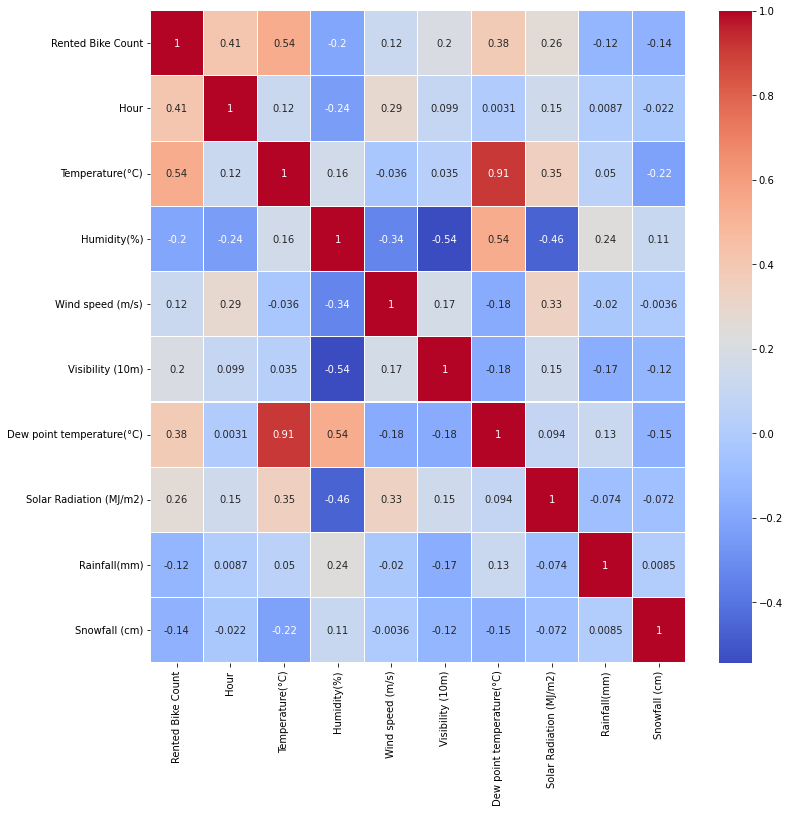

In [ ]:
#El siguiente grafico heatmap muestra el coeficiente de correlación de una variable comparada con las demas. La variable rented bike count no muestra ninguna correlación fuerte donde esta aumente debido a otra variable. La de mayor "relevancia" seria con temperatura con un ro=0.54, sin embargo esta no es lo suficientemente alto para poder afirma una gran dependencia lineal.
 
from matplotlib import pyplot as plt
data_corr= df.corr()       
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')